<a href="https://colab.research.google.com/github/tutalae/wineML/blob/main/wineTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import library 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree

In [2]:
# Import Data

dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
feature = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"]
wine_data = pd.read_csv(dataset_url, names = feature)
print ("Dataset Lenght:: ", len(wine_data))
print ("Dataset Shape:: ", wine_data.shape)
wine_data.tail()

Dataset Lenght::  178
Dataset Shape::  (178, 14)


,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [12]:
X = wine_data.drop(columns= "Cultivator", axis = 1)
X

,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [13]:
y = wine_data["Cultivator"]
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Cultivator, Length: 178, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
print(f'#traning = {X_train.shape[0]}')
print(f'#validation = {X_val.shape[0]}')
print(f'#test = {X_test.shape[0]}')


#traning = 113
#validation = 29
#test = 36


In [22]:
clf_gini = DecisionTreeClassifier(criterion = "entropy", random_state = 100,  max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)
feature_2 = ["Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"]
target = ["1","2","3"]

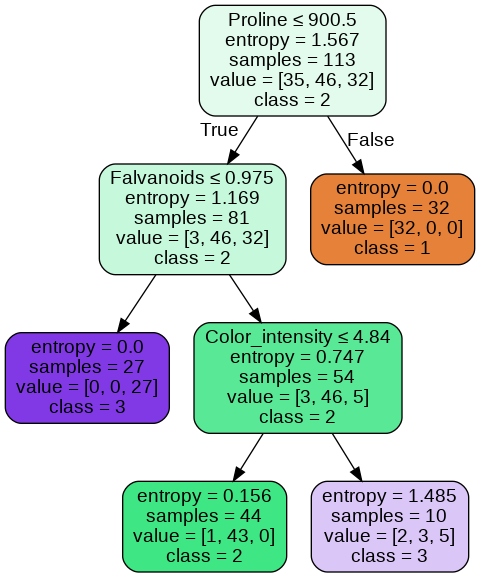

In [23]:
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,
 feature_names=feature_2, 
 class_names=target,
 filled=True, rounded=True,
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [24]:
# sequential model
def get_SequentialModel(learning_rate = 0.01):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(100,activation='relu',input_shape=(1,)))
    model.add(keras.layers.Dense(100,activation='relu'))
    model.add(keras.layers.Dense(1))
    model.compile(loss='mse',optimizer=keras.optimizers.SGD(learning_rate=learning_rate))
    return model

In [30]:
y_pred = clf_gini.predict(X_test)

In [31]:
print('Accuracy of Decision Tree classifier on training set: {:.4f}'
     .format(clf_gini.score(X_train, y_train)*100))
print('Accuracy of Decision Tree classifier on test set: {:.4f}'
     .format(clf_gini.score(X_test, y_test)*100))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy of Decision Tree classifier on training set: 94.6903
Accuracy of Decision Tree classifier on test set: 86.1111
              precision    recall  f1-score   support

           1       0.92      0.79      0.85        14
           2       0.86      0.92      0.89        13
           3       0.80      0.89      0.84         9

    accuracy                           0.86        36
   macro avg       0.86      0.87      0.86        36
weighted avg       0.87      0.86      0.86        36

[[11  1  2]
 [ 1 12  0]
 [ 0  1  8]]


In [35]:
#SVM

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn import svm

In [37]:
# Fitting the Transformer APIPython
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# linear
clf_svm = svm.SVC(kernel="linear")
clf_svm.fit(X_train, y_train)
clf_svm_scaled = svm.SVC(kernel="linear")
clf_svm_scaled.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
# predict
y_pred = clf_svm.predict(X_test)  
y_pred_scaled = clf_svm_scaled.predict(X_test_scaled)

In [40]:
# Evaluation
print('Non Standardize')
print('Accuracy of SVM classifier on training set: {:.4f}'
     .format(clf_svm.score(X_train, y_train)*100))
print('Accuracy of SVM classifier on test set: {:.4f}'
     .format(clf_svm.score(X_test, y_test)*100))
print('\nStandardize')
print('Accuracy of SVM classifier on training set: {:.4f}'
     .format(clf_svm_scaled.score(X_train_scaled, y_train)*100))
print('Accuracy of SVM classifier on test set: {:.4f}'
     .format(clf_svm_scaled.score(X_test_scaled, y_test)*100))
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_scaled))
print(confusion_matrix(y_test,y_pred_scaled))

Non Standardize
Accuracy of SVM classifier on training set: 100.0000
Accuracy of SVM classifier on test set: 88.8889

Standardize
Accuracy of SVM classifier on training set: 100.0000
Accuracy of SVM classifier on test set: 97.2222
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

[[14  0  0]
 [ 1 12  0]
 [ 0  0  9]]


In [42]:
# non-linearly 
clf_svm = svm.SVC(kernel= "rbf")
clf_svm.fit(X_train, y_train)
clf_svm_scaled = svm.SVC(kernel="rbf")
clf_svm_scaled.fit(X_train_scaled, y_train)
y_pred = clf_svm.predict(X_test)
y_pred_scaled = clf_svm_scaled.predict(X_test_scaled)
print('Non Standardize')
print('Accuracy of SVM classifier on training set: {:.4f}'
     .format(clf_svm.score(X_train, y_train)*100))
print('Accuracy of SVM classifier on test set: {:.4f}'
     .format(clf_svm.score(X_test, y_test)*100))
print('\nStandardize')
print('Accuracy of SVM classifier on training set: {:.4f}'
     .format(clf_svm_scaled.score(X_train_scaled, y_train)*100))
print('Accuracy of SVM classifier on test set: {:.4f}'
     .format(clf_svm_scaled.score(X_test_scaled, y_test)*100))
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_scaled))
print(confusion_matrix(y_test,y_pred_scaled))

Non Standardize
Accuracy of SVM classifier on training set: 75.2212
Accuracy of SVM classifier on test set: 69.4444

Standardize
Accuracy of SVM classifier on training set: 100.0000
Accuracy of SVM classifier on test set: 97.2222
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.93      1.00      0.96        13
           3       1.00      0.89      0.94         9

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36

[[14  0  0]
 [ 0 13  0]
 [ 0  1  8]]


In [43]:
#  Classification: Neural Network

from sklearn.metrics import accuracy_score,mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier

In [49]:
# Fitting the Transformer APIPython
# Fitting the Transformer APIPython
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
NN = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
NN.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [53]:
NN_scaled = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
NN_scaled.fit(X_train_scaled,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [54]:
y_pred = NN.predict(X_test)  
y_pred

array([3, 2, 3, 2, 1, 3, 3, 1, 3, 2, 1, 3, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2,
       3, 3, 3, 3, 1, 1, 1, 3, 2, 3, 3, 1, 2, 2])

In [55]:
y_pred_scaled = NN_scaled.predict(X_test_scaled)  
y_pred_scaled

array([3, 2, 1, 2, 1, 3, 2, 1, 3, 2, 1, 1, 2, 1, 2, 2, 3, 1, 2, 1, 1, 2,
       3, 1, 1, 3, 1, 1, 1, 3, 2, 3, 3, 1, 2, 2])

In [56]:
print('Non Standardize')
print('Accuracy of NN classifier on training set: {:.4f}'
     .format(NN.score(X_train, y_train)*100))
print('Accuracy of NN classifier on test set: {:.4f}'
     .format(NN.score(X_test, y_test)*100))
print('\nStandardize')
print('Accuracy of NN classifier on training set: {:.4f}'
     .format(NN_scaled.score(X_train_scaled, y_train)*100))
print('Accuracy of NN classifier on test set: {:.4f}'
     .format(NN_scaled.score(X_test_scaled, y_test)*100))

Non Standardize
Accuracy of NN classifier on training set: 91.1504
Accuracy of NN classifier on test set: 83.3333

Standardize
Accuracy of NN classifier on training set: 100.0000
Accuracy of NN classifier on test set: 97.2222


In [57]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_scaled))
print(confusion_matrix(y_test,y_pred_scaled))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

[[14  0  0]
 [ 1 12  0]
 [ 0  0  9]]


In [66]:
# K-Means
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score, homogeneity_score
import matplotlib.pyplot as plt

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit to all data
scaler.fit(X)
X_scaled = scaler.transform(X)

In [63]:
# Dimension Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ["principal component 1", "principal component 2"])
principalDf.head()
#Concatenating DataFrame along axis = 1. finalDf is the final DataFrame before plotting the data.
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Cultivator
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1


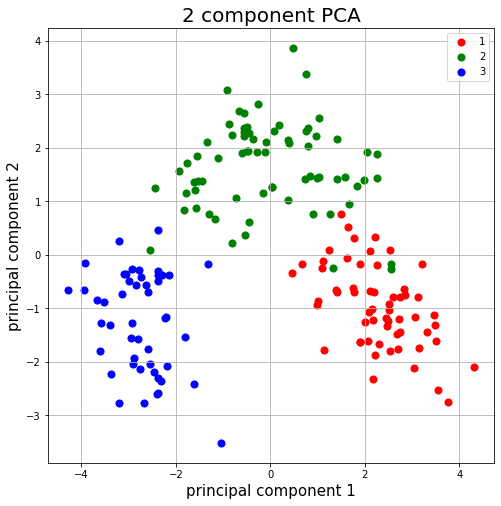

In [67]:
#Data Visualization
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel("principal component 1", fontsize = 15)
ax.set_ylabel("principal component 2", fontsize = 15)
ax.set_title("2 component PCA", fontsize = 20)
Cultivators = [1, 2, 3]
colors = ["r", "g", "b"]
for Cultivator, color in zip(Cultivators,colors):
    indicesToKeep = finalDf['Cultivator'] == Cultivator
    ax.scatter(finalDf.loc[indicesToKeep, "principal component 1"]
               , finalDf.loc[indicesToKeep, "principal component 2"]
               , c = color
               , s = 50)
ax.legend(Cultivators)
ax.grid()

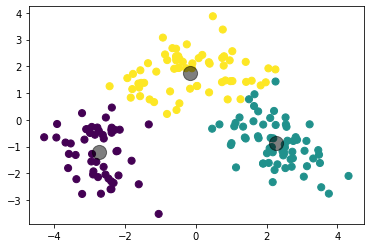

In [68]:
# Fitting Model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(principalDf)
y_kmeans = kmeans.predict(principalDf)
plt.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [69]:
# Evaluation
labels_true = finalDf['Cultivator'].values
clustering_predicted = y_kmeans
print('Homogeneity score is {:.4f}'.format(homogeneity_score(labels_true, clustering_predicted)))

Homogeneity score is 0.8840
